# The effect of irrigating the desert (south of Alexandria)

IHE transient groundwater

Olsthoorn, 2019-01-04

South-west of Alexandria part of the Sahara desert has been reclaimed by irrigating with river Nile water since the 1970s. This area is about 30x30 km and the recharge is about 1.5 m/year, half of which is evaporated by the crops and half is recharged, i.e. largely lost for crop production (it may become too saline in the subsurface).

The Sahara aquifer is about 200 m thick and unconfined. The initial water table was at 30 below ground surface.

We can simulate this situation by means of Theis wells placed in a regular grid to simulate the area-wide irrigation and then superimpose the result to see what happens at arbitrary locations over time.

Of course, we may also make influence maps by computing the results for a grid of points and then contouring the results. It's just more computation time, but not necesarily more complicated.

Let the center of the irrigated area coincide with our coordinate system.

In [1]:
import numpy as np
from scipy.special import exp1 # Theis well function
import matplotlib.pyplot as plt

In [41]:
# aquifer
kD = 200 * 25 * (365) # m2/y
S = 0.25

In [82]:
# place wells
a = 1000. # m cell size
xw = np.linspace(-14.5e3, 14.5e3, 30)
yw = np.linspace(-14.5e3, 14.5e3, 30)
x = np.linspace(-15e3, 15e3, 31)
y = np.linspace(-15e3, 15e3, 31)
Xw, Yw = np.meshgrid(xw, yw)

In [83]:
# Irrigation in m/y
q = 0.75 # m/y
Q = a**2 * q  # irrigation per well in m3/y

In [89]:
# observation point
x0 = 0
Y0 = np.array([0, 10, 20, 40, 60]) * 1e3

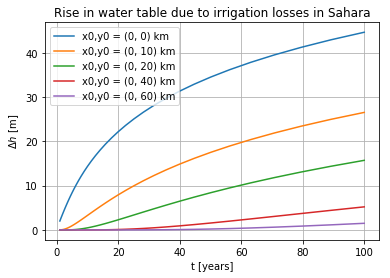

In [99]:
# effect on observation point

plt.title('Rise in water table due to irrigation losses in Sahara')
plt.xlabel('t [years]')
plt.ylabel('$\Delta h$ [m]')
plt.grid()

for y0 in Y0:
    R = np.sqrt((x0 - Xw)**2 + (y0 - Yw)**2)

    t = np.logspace(0, 2, 41) # time in years

    s = np.zeros_like(t)
    for r in R.ravel()[0:480]:
        s += Q/(4 * np.pi * kD) * exp1(r**2 * S/ (4 * kD * t))
    plt.plot(t, s, label='x0,y0 = ({:.0f}, {:.0f}) km'.format(x0/1000, y0/1000))
plt.legend()
plt.show()